# Calculating \\(\pi \\) using a Monte Carlo algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches                # matplotlib.patches to draw shapes

(-1.1, 1.1)

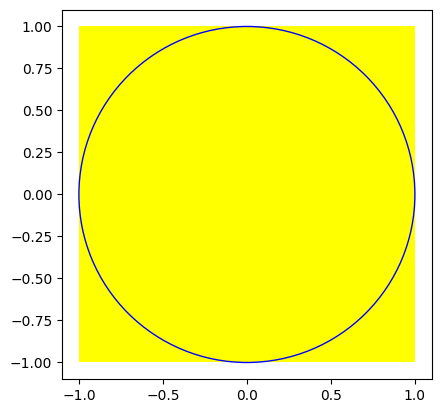

In [2]:
fig = plt.figure()                           #our canvas
ax = fig.add_subplot(111, aspect='equal')       #adds axes

rectangle = patches.Rectangle((-1,-1),2,2, facecolor='yellow')
ax.add_patch(rectangle)

circle = patches.Circle((0,0),1, facecolor='none', edgecolor='blue')
ax.add_patch(circle)
 
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

## Comparing the areas

 \\( \pi = 4\frac{A_\mathrm{circle}}{A_\mathrm{square}}\\). We can use this ratio to estimate the value of \\( \pi \\). 

### Measure the area ratio by counting randomly generated points

In [3]:
points = 100000

rand = 2*np.random.rand( 2*points) -1

In [4]:
randpoints = rand.reshape( points,2 )

In [5]:
normpoints = randpoints[:,0]**2 + randpoints[:,1]**2

In [6]:
pointsOut = randpoints[normpoints > 1]
pointsIn = randpoints[normpoints <= 1]

In [7]:
piapprox = 4 * len(pointsIn)/points
print(piapprox)

3.1428


In [8]:
piapprox - np.pi

0.0012073464102067

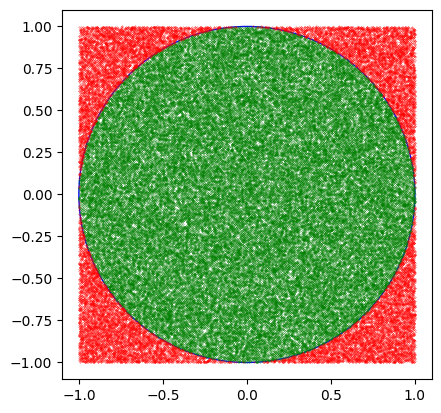

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

#rectangle = patches.Rectangle((-1,-1),2,2, facecolor='red')
#ax.add_patch(rectangle)

circle = patches.Circle((0,0),1, facecolor='none', edgecolor='blue')
ax.add_patch(circle)

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

plt.scatter(pointsIn[:,0], pointsIn[:,1], color = 'green', s=0.05)
plt.scatter(pointsOut[:,0], pointsOut[:,1], color = 'red', s=0.05)

### Alternative: Loop method

In [10]:
i = 0
counter = 0

while i<points:
    if np.linalg.norm( 2*np.random.rand(2)-1 ) < 1:
        counter = counter + 1
    i = i+1

In [11]:
piapprox = 4 * counter / points
print(piapprox)

3.14804


In [12]:
piapprox - np.pi

0.006447346410206833

### Time comparison

Array/List method

In [13]:
%%timeit

rand = 2*np.random.rand( 2*points ) - 1
randpoints = rand.reshape( points,2 )
normpoints = randpoints[:,0]**2 + randpoints[:,1]**2
pointsIn = randpoints[normpoints < 1]
piapprox = 4 * len(pointsIn) / points

10.4 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Loop method

In [14]:
%%timeit

i = 0
counter = 0

while i<points:
    if np.linalg.norm( 2*np.random.rand(2)-1 ) < 1:
        counter = counter + 1
    i = i+1
    
piapprox = 4 * counter / points

1.11 s ± 58.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
